# Imports

In [2]:
import numpy as np
import corner
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from astropy.table import Table

import model_flux_ratio as mfr

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The backend.qt4 rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1. In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


# Compare measured vs recovered fluxes

## Load input fluxes

In [33]:
input_flux = Table.read('/Users/thsyu/Google Drive File Stream/My Drive/BCDs/mcmc_science_frames/mcmc_input/no_HaHb/J0018p2345', format='ascii', delimiter=' ')

In [34]:
input_flux

Wavelength,Species,Flux Ratio,Flux Ratio Errors,EW,EW Errors
float64,str15,float64,float64,float64,float64
3890.166,hydrogen+helium,0.1582759169114265,0.0030554803931143668,6.822265363694296,0.14761453064714286
4102.891,hydrogen,0.23136232164173728,0.0030316403149170273,10.925457067384784,0.17181518952902328
4341.684,hydrogen,0.4366140112629308,0.0031533709118451887,30.74620729948228,0.42968047048167984
4472.755,helium,0.029599718856275718,0.0021317915279604775,1.6469645723243258,0.1195894136518671
4862.721,hydrogen,1.0,0.004123510451148708,70.75069575133098,0.8381573928261268
5017.079,helium,0.023561825367207453,0.0021374364487258208,1.6592155734967964,0.15182092555246632
5877.299,helium,0.030227269327079212,0.0004549480919844391,10.233905311190775,0.1748648726025513
6564.612,hydrogen,1.0,0.001477663103393201,406.62683240131093,2.9797764325930807
6679.994,helium,0.009914750708883022,0.00036235299269081207,4.3337488919533795,0.1635144439650765


## Load MCMC best recovered parameters

In [3]:
ndim = 8
onevar = -1

nwalkers = 500
nmbr = 1000
burnin = int(0.8*nmbr) #int(0.1*nmbr)

chains = np.load('/Users/thsyu/Software/Yp/J0018p2345_500walkers_1000steps.npy')
samples = chains[:, burnin:, :].reshape((-1, ndim))

In [4]:
prenams = ['y+', 'temperature', '$log(n_{e})$', 'c(H\\beta)', '$a_{H}$', '$a_{He}$', '$\\tau_{He}', '$log(\\xi)$'] #'$n_{HI}$']
input_vals = np.array([0.08, 18000, 2, 0.1, 1.0, 1.0, 1.0, -4]) #test_MCMC
y_plus_mcmc, temp_mcmc, log_dens_mcmc, c_Hb_mcmc, a_H_mcmc, a_He_mcmc, tau_He_mcmc, log_xi_mcmc = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

print ('Best parameter values:')
print ('y+', y_plus_mcmc)
print ('T', temp_mcmc)
print ('log(n_e)', log_dens_mcmc)
print ('c(Hb)', c_Hb_mcmc)
print ('a_H', a_H_mcmc)
print ('a_He', a_He_mcmc)
print ('tau_He', tau_He_mcmc)
print ('log(xi)', log_xi_mcmc)
print ('\n Input parameter values:')
print (input_vals)

Best parameter values:
y+ (0.06976619559292947, 0.0024517940648641073, 0.0015629234692768196)
T (13939.314093393736, 1236.6516700792217, 1215.491886859887)
log(n_e) (2.100950915603529, 0.10925326788958722, 0.11527890722692113)
c(Hb) (0.20020395523646378, 0.022819948944960006, 0.025608164106587034)
a_H (0.27582676732883754, 0.25411818196477237, 0.1877053996571012)
a_He (0.06778488638862307, 0.07648951651109775, 0.04825451876846334)
tau_He (0.18220965049941165, 0.25453510700476634, 0.13565140590494984)
log(xi) (-3.620561275241675, 1.3513323541941196, 1.598683680334072)

 Input parameter values:
[ 8.0e-02  1.8e+04  2.0e+00  1.0e-01  1.0e+00  1.0e+00  1.0e+00 -4.0e+00]


### Generate fluxes from recovered parameters

In [10]:
input_flux['EW'][np.where(input_flux['Wavelength'] == 10940.082)[0][0]]

47.242381554983076

In [11]:
mfr.generate_emission_line_ratio('J0018p2345_recovered', input_flux['Wavelength'][:-1], input_flux['EW'][:-1], \
                                 input_flux['EW'][np.where(input_flux['Wavelength'] == 4862.721)[0][0]], \
                                 y_plus_mcmc[0], temp_mcmc[0], log_dens_mcmc[0], c_Hb_mcmc[0], \
                                 a_H_mcmc[0], a_He_mcmc[0], tau_He_mcmc[0], log_xi_mcmc[0], \
                                 input_flux['EW'][np.where(input_flux['Wavelength'] == 10940.082)[0][0]])


Working on  3890.166
Working on  4102.891
Working on  4341.684
Working on  4472.755
Working on  4862.721
Working on  5017.079
Working on  5877.299
Working on  6564.612
Working on  6679.994
Working on  7067.198
Working on  10833.306


## Load recovered fluxes

In [13]:
output_flux = Table.read('J0018p2345_recovered', format='ascii', delimiter=' ')

In [15]:
output_flux

Wavelength,Species,Flux Ratio,EW
float64,str8,float64,float64
3890.166,hydrogen,0.1592231804925618,6.822265363694296
4102.891,hydrogen,0.23120269445699526,10.925457067384784
4341.684,hydrogen,0.43718560354906805,30.74620729948228
4472.755,helium,0.030542437435206203,1.6469645723243258
4862.721,hydrogen,1.0,70.75069575133098
5017.079,helium,0.020487144315560212,1.6592155734967964
5877.299,helium,0.09883837873692664,10.233905311190775
6564.612,hydrogen,3.224630666591622,406.62683240131093
6679.994,helium,0.029348320335349374,4.3337488919533795


In [25]:
output_flux_noHaHb = np.array(output_flux['Flux Ratio'])

print (output_flux_noHaHb)

[0.15922318 0.23120269 0.4371856  0.03054244 1.         0.02048714
 0.09883838 3.22463067 0.02934832 0.02389859 2.67666449]


In [26]:
output_flux_noHaHb[6] = output_flux_noHaHb[6] / output_flux['Flux Ratio'][7]
output_flux_noHaHb[7] = output_flux_noHaHb[7] / output_flux['Flux Ratio'][7]
output_flux_noHaHb[8] = output_flux_noHaHb[8] / output_flux['Flux Ratio'][7]
output_flux_noHaHb[9] = output_flux_noHaHb[9] / output_flux['Flux Ratio'][7]

In [27]:
output_flux_noHaHb

array([0.15922318, 0.23120269, 0.4371856 , 0.03054244, 1.        ,
       0.02048714, 0.03065107, 1.        , 0.0091013 , 0.00741127,
       2.67666449])

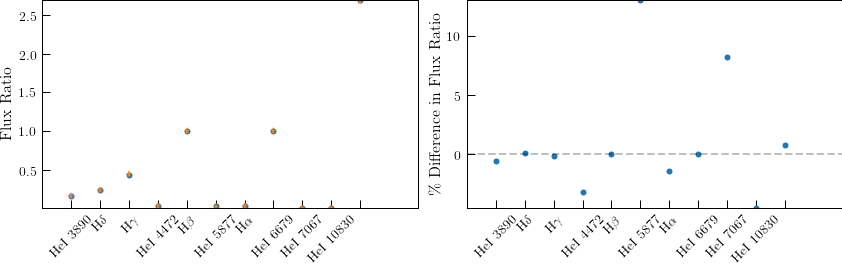

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(input_flux['Flux Ratio'][:-1], 'o', label='Measured')
ax1.plot(output_flux_noHaHb, marker='*', markersize=8, linestyle='None', label='MCMC Predicted')
ax1.set_xticks(np.arange(0, len(output_flux_noHaHb), 1))
ax1.set_xticklabels(['HeI 3890', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax1.set_xlim(-1, len(output_flux_noHaHb)+1)
#ax1.set_ylim(-0.5, 4.0)
ax1.set_ylabel('Flux Ratio')

ax2.plot(100*(input_flux['Flux Ratio'][:-1]-output_flux_noHaHb)/input_flux['Flux Ratio'][:-1], 'o')
ax2.axhline(0.0, ls='--', color='black', alpha=0.25)
ax2.set_xticks(np.arange(0, len(output_flux_noHaHb), 1))
ax2.set_xticklabels(['HeI 3890', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax2.set_xlim(-1, len(output_flux_noHaHb)+1)
ax2.set_ylabel(r'\% Difference in Flux Ratio')

#f.savefig('/Users/thsyu/Software/Yp/Tol.pdf', overwrite=True)
f.show()

In [35]:
input_flux['Flux Ratio'][:-1]-output_flux_noHaHb

-0.0009472635811352825
0.00015962718474202275
-0.0005715922861372347
-0.0009427185789304855
0.0
0.0030746810516472413
-0.0004238001925805611
0.0
0.0008134540427534916
-0.0003198102727680705
0.022017810233759594
